<a href="https://colab.research.google.com/github/eduardosalvarenga/nlp_desafioestagio/blob/main/nlp_desafio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Nome: Eduardo da Silva Alvarenga

**Objetivo**: Treinar um modelo de machine learning para dizer qual a categoria do produto, baseado nas informações da base de dados.<br>
**Feito com**: Pandas, TensorFlow, MatplotLib, Numpy, SkLearn<br>
**Modelo Final**: Feed-Forward neural network (Dense model) - Usando de Processamento de Linguagem Natural

Notebook separado em:

*   Análise dos Dados
*   Pré-processamento de Dados
*   Vetorização de Texto
*   Construção de Modelos
*   Comparação entre modelos
*   Análise do Modelo Final
*   Considerações Finais




In [ ]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random

In [ ]:
# Por se tratar de um modelo de redes neurais, é recomendado estar utilizando placas gráficas,
# o código abaixo indica se o Google Colab está com a GPU ligada no ambiente de execução.
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-163a1fe7-1a06-4c51-6491-ea428d670107)


In [ ]:
url = 'https://raw.githubusercontent.com/eduardosalvarenga/dados/main/solvimm-desafio.tsv'
df = pd.read_table(url)

In [ ]:
df.head()

,Unnamed: 0,marketplace,customer_id,review_id,product_id,product_parent,product_title,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,product_category
0,762868,UK,29723892,R3VNENIATVV8QE,B00NOPQU2K,627793267,The Girl on the Train,5,0,1,N,N,Gripping you right where it matters,I know to say a story is &#34;gripping&#34; is...,2015-04-27,Digital_Ebook_Purchase
1,1284183,UK,41072087,R2U3LV67N99770,B0013F2LSK,13214624,11,5,2,5,N,Y,The Best of Me,"This album is totally fantastic, a great mix o...",2008-03-18,Music
2,1599315,UK,49938094,R3RO94POCHNI9V,B005CVWWJY,769273676,Ready Player One,5,0,0,N,Y,superb,Enjoyed every second of this book. It took me...,2014-08-28,Digital_Ebook_Purchase
3,204782,UK,14398213,R3S2BB5SBWBC1,B00008AWV3,841759677,The Four Feathers [DVD] [1939],5,1,1,N,Y,"Sweeping, authentic historic drama",I loved the historic scenes---the English coun...,2013-12-27,Video DVD
4,352938,UK,20140500,R27E2PNXJSWJIN,B00FAXJHCY,803172158,The Martian,4,0,0,N,Y,... a few pages to get through it but a good b...,May have skipped a few pages to get through it...,2015-06-06,Digital_Ebook_Purchase


In [ ]:
# Verificação dos tipos de dados disponíveis em cada coluna
# Tendo em vista o nome e os tipos de cada coluna, os dados do tipo Objeto são os que mais se distinguem para a análise do dataset.
# Foi escolhido trabalhar exclusivamente com a coluna "review_body" que parece conter as informações centrais do conjunto.
# Para isso será tilizado um modelo de Processamento de Linguagem Natural.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170583 entries, 0 to 170582
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Unnamed: 0         170583 non-null  int64 
 1   marketplace        170583 non-null  object
 2   customer_id        170583 non-null  int64 
 3   review_id          170583 non-null  object
 4   product_id         170583 non-null  object
 5   product_parent     170583 non-null  int64 
 6   product_title      170583 non-null  object
 7   star_rating        170583 non-null  int64 
 8   helpful_votes      170583 non-null  int64 
 9   total_votes        170583 non-null  int64 
 10  vine               170583 non-null  object
 11  verified_purchase  170583 non-null  object
 12  review_headline    170583 non-null  object
 13  review_body        170582 non-null  object
 14  review_date        170578 non-null  object
 15  product_category   170583 non-null  object
dtypes: int64(6), object(

## Pré-Processamento de Dados

In [ ]:
# Verificação da quantidade de dados nulos em cada coluna e sua %
count = df.isnull().sum().sort_values(ascending=False)
percentage = ((df.isnull().sum()/len(df)*100)).sort_values(ascending=False)
missing_data = pd.concat([count, percentage], axis=1, keys=['Count', 'Percentage'])
missing_data

,Count,Percentage
review_date,5,0.002931
review_body,1,0.000586
Unnamed: 0,0,0.000000
marketplace,0,0.000000
customer_id,0,0.000000
review_id,0,0.000000
product_id,0,0.000000
product_parent,0,0.000000
product_title,0,0.000000
star_rating,0,0.000000


In [ ]:
# Criação de uma nova variável contendo o dataset porém com a exclusão das linhas
# onde dados nulos estavam localizados.
df_no_null = df.dropna()

In [ ]:
# Embaralhamento dos dados
df_shuffled = df_no_null.sample(frac=1, random_state=21)

In [ ]:
# Exclusão das colunas que não serão utilizadas para a análise.
df_shuffled.drop(columns = ['Unnamed: 0', 'marketplace', 'customer_id', 'review_id', 'product_id', 'product_parent', 
                             'product_title', 'star_rating', 'helpful_votes', 'total_votes', 'vine', 
                             'verified_purchase', 'review_headline', 'review_date'], inplace = True)

In [ ]:
df_shuffled.head()

,review_body,product_category
148070,The book arrived quickly and in good conditio...,Books
75701,Cant say enough about this record. Just brilli...,Music
117610,takes a long time to receive from uk to the us...,Video DVD
169811,I am very pleased with the quality of the cd i...,Music
45776,"Excellent storyline, and puzzles to solve. Sha...",Mobile_Apps


In [ ]:
import re
import string

# Tratamento inicial das reviews, buscando padronizar os textos e excluir informações desnecessárias
# Ex: Números em uma review não parecem importantes para distinguir a categoria de um produto.

def text_clean(text):
  text = text.lower() # Transforma o texto em lowercase
  text = re.sub(r'<[^>]+>', '', text)
  text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text) # remove pontuação, URL e @
  text = re.sub('\w*\d\w*', '', text) # Remove os dígitos
  return text

cleaned1 = lambda x: text_clean(x)

In [ ]:
# Criação de uma coluna com os dados limpos
df_shuffled['cleaned_review'] = pd.DataFrame(df_shuffled.review_body.apply(cleaned1))

df_shuffled.head(10)

,review_body,product_category,cleaned_review
148070,The book arrived quickly and in good conditio...,Books,the book arrived quickly and in good conditio...
75701,Cant say enough about this record. Just brilli...,Music,cant say enough about this record just brillia...
117610,takes a long time to receive from uk to the us...,Video DVD,takes a long time to receive from uk to the us...
169811,I am very pleased with the quality of the cd i...,Music,i am very pleased with the quality of the cd i...
45776,"Excellent storyline, and puzzles to solve. Sha...",Mobile_Apps,excellent storyline and puzzles to solve shame...
97462,It's a really good film for the kids and to be...,Video DVD,its a really good film for the kids and to be ...
163257,This is a Kindle Fire cover and stand and does...,PC,this is a kindle fire cover and stand and does...
132438,"pure genius,Kind Regards Lorraine",Music,pure geniuskind regards lorraine
144665,Thought i'd write a review because i remember ...,Video DVD,thought id write a review because i remember w...
3906,My card was debited on 18th Feb 09 I waited fo...,Video DVD,my card was debited on feb i waited for the ...


In [ ]:
# Definição das variáveis, definindo-se X como a independente e y como a dependente.
X = df_shuffled["cleaned_review"].to_numpy()
y = df_shuffled["product_category"].to_numpy()

In [ ]:
print(X)

['the book arrived quickly  and in good condition and i started to read it as part of our book club read  i must admit after page  i thought that it was a step too far as  beliving in it was concerned  i do have to think that what i read is believable about  of the book group thought the same as me  as they asked me to try and finish it  but i couldnt'
 'cant say enough about this record just brillian steve hogarths voice is even more incredible so utterly expressive and swoopier than ever some soaring rothery guitars all the eliments of classic marillion and yet sounding more comtemory than ever these guys really derserve to be the biggest thing on the plannet enjoy them as your personal jewel'
 'takes a long time to receive from uk to the usai does play on us region  psps so it is probably region free codeso yes i would recommend this movie to everybody'
 ...
 'lost a star because of constant trying to get you to spend money on coins and energy its a great addictive game cant put it 

In [ ]:
print(y)

['Books' 'Music' 'Video DVD' ... 'Mobile_Apps' 'Digital_Ebook_Purchase'
 'Digital_Video_Download']


In [ ]:
# Codificação da variável dependente em números para melhor entendimento do computador,
# Como a ordem não importa e o número de categorias nos dados é alto foi escolhido usar LabelEncoder no lugar de OneHotEncoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(y)
print(y)

[ 3 17 28 ... 16  5  7]


In [ ]:
# Separação dos dados em treinamento e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(136461, 34116, 136461, 34116)

In [ ]:
# Descobrindo o número médio de tokens (palavras) nas reviews de produtos
round(sum([len(i.split()) for i in X_train])/len(X_train))

64

## Vetorização de Texto

In [ ]:
number_of_categories = len(set(y))
number_of_categories

32

In [ ]:
# Aqui estamos começando a mapear as palavras das reviews em números (Tokens)
# Como não temos conhecimento do número de palavras únicas no texto, foi optado por um número múltiplo de 10000
# Como há grande diferença no tamanho de reviews, foi escolhido que o número sequencial de tokens (output_sequence_length) 
# seria o número médio de Tokens nas reviews.

sequence_length=64
number_of_tokens=20000

from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

text_vectorizer = TextVectorization(max_tokens=number_of_tokens,
                                    output_mode="int",
                                    output_sequence_length=sequence_length,
                                    )

In [ ]:
# Adaptando as reviews de treinamento no TextVectorizer criado
text_vectorizer.adapt(X_train)

In [ ]:
# Teste do text_vectorizer em uma review aleatória de treinamento
random_sentence = random.choice(X_train)
print(f"Texto original:\n {random_sentence} \n\nVersão vetorial:")
text_vectorizer([random_sentence])

Texto original:
 excellent 

Versão vetorial:


<tf.Tensor: shape=(1, 64), dtype=int64, numpy=
array([[109,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])>

Número de palavras no vocabulário: 20000


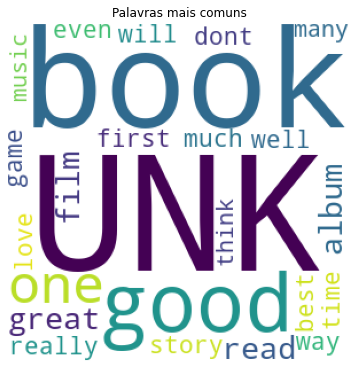

In [ ]:
# Descobrir o número de palavras únicas no vocabulário
# Aqui conseguimos ver que palavras-chaves como "music", "album", "book", "film", "game"
# estão dentre as palavras mais comuns em nosso vocabulário

words_in_vocab = text_vectorizer.get_vocabulary()
top_words = words_in_vocab[:100]
bottom_words = words_in_vocab[-100:]
print(f"Número de palavras no vocabulário: {len(words_in_vocab)}")

from wordcloud import WordCloud, STOPWORDS
stopwords = STOPWORDS
comment_words = ''

for val in top_words:
  val = str(val)
  tokens = val.split()

  comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 300, height = 300,
                      background_color="white",
                      stopwords=stopwords,
                      min_font_size=10).generate(comment_words)

plt.figure(figsize=(5,5), facecolor = None)
plt.imshow(wordcloud)
plt.title("Palavras mais comuns")
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

In [ ]:
# Aqui estamos transformando nossos números (tokens) em um embedding
# o propósito é que o embedding pode ser aprendido e melhorado durante o treinamento
# enquanto apenas tokens são estáticos.
tf.random.set_seed(42)
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=number_of_tokens,
                            output_dim=128,
                             embeddings_initializer="uniform",
                             input_length=sequence_length
                             )
embedding

In [ ]:
# Teste do embedding com uma frase aleatória do treinamento
random_review = random.choice(X_train)
print(f"Texto original:\n {random_review}\
        \n\nVersão Embedded: ")

sample_embed = embedding(text_vectorizer([random_review]))
sample_embed

Texto original:
 i purchased the above dvd as i heard heard a lot about it it was good value for money and arrived very quickly unfortunately i did not really like the story and have notwatched it l since        

Versão Embedded: 


<tf.Tensor: shape=(1, 64, 128), dtype=float32, numpy=
array([[[ 0.02248487, -0.02848336,  0.04786098, ...,  0.03069806,
         -0.04317403, -0.04145076],
        [ 0.0379    , -0.03258125,  0.03348592, ..., -0.01274431,
          0.03421792, -0.03673412],
        [ 0.02504804,  0.02770906,  0.01542609, ..., -0.04612003,
         -0.02924401, -0.00331711],
        ...,
        [ 0.01645621, -0.00589932, -0.01471175, ..., -0.02511839,
          0.00912381, -0.00024097],
        [ 0.01645621, -0.00589932, -0.01471175, ..., -0.02511839,
          0.00912381, -0.00024097],
        [ 0.01645621, -0.00589932, -0.01471175, ..., -0.02511839,
          0.00912381, -0.00024097]]], dtype=float32)>

In [ ]:
# Aqui estamos vendo o exemplo do embedding de um único token
# Cada token foi transformado em um vetor de tamanho 128
sample_embed[0][0], sample_embed[0][0].shape, random_review[0]

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([ 2.24848725e-02, -2.84833554e-02,  4.78609838e-02, -4.92732525e-02,
         2.39694454e-02,  1.65317170e-02, -4.21217196e-02,  2.34782808e-02,
         3.37826870e-02, -1.30166784e-02, -1.99116953e-02,  4.13453914e-02,
         4.24488671e-02, -1.37188546e-02,  2.62849815e-02, -4.58369628e-02,
         3.07335891e-02, -2.02727914e-02,  3.23081054e-02,  4.64849211e-02,
        -3.60610709e-02, -5.41896746e-03,  3.24229710e-02,  4.22085039e-02,
         3.79009284e-02, -2.72375699e-02, -3.32339406e-02, -3.36158276e-02,
         2.85722315e-04,  3.16037796e-02,  3.16189267e-02, -3.55925933e-02,
         4.21212576e-02, -9.75701958e-03, -3.44485864e-02, -4.01101932e-02,
        -2.34842300e-05, -3.76854651e-02, -2.52356175e-02, -2.23137625e-02,
        -4.59641106e-02,  2.91262008e-02,  9.18730348e-03, -2.01575644e-02,
        -4.70416918e-02,  2.39054076e-02,  1.64473318e-02,  5.89722395e-03,
        -1.26442201e-02,  2.06940249e-0

## Construção dos modelos

Para melhor escolher o modelo final, foi testado diferentes modelos com parâmetros padrões. No fim há uma comparação entre os resultados de cada modelo para ver qual melhor performou tanto no conjunto de treinamento quanto no conjunto de testes.<br>
Por motivos de tempo e performance foram escolhidos apenas 4 modelos, mais especificamente os seguintes:



*   **Modelo 0:** Baseline
*   **Modelo 1:** Feed-Forward neural network (Dense model)
*   **Modelo 2:** LSTM model
*   **Modelo 3:** GRU model

O modelo 0 serve para adquirirmos uma linha de base que esperamos que os modelos mais profundos superem.

Por se tratar de uma classificação de multicategorias:

*   A função de ativação da output foi definida como **softmax**
*   A função de perda foi definida como **Sparse Categorical CrossEntropy** (Por estar utilizando-se de LabelEncoder e não OneHotEncoder foi utilizado Sparse)

Como otimizador foi escolhido a técnica ADAM.

### Modelo 0: Baseline

Por se tratar de um modelo mais simples, o modelo de base cria uma Pipeline com o Sckit-Learn, usando da fórmula TF-IDF (term frequency-inverse document frequency) para converter palavras em números e então o [Algorítimo Multinomial Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB).

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Criação da tokenização e da pipeline do modelo
model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), # converte palavras em números
                    ("clf", MultinomialNB()) # modela o texto
])

# Ajusta a pipeline nos dados de treinamento
model_0.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
# Avaliação do modelo de base
baseline_score = model_0.score(X_test, y_test)
print(f"Nosso modelo de base adquiriu uma acurácia de: {baseline_score*100:.2f}%")

Nosso modelo de base adquiriu uma acurácia de: 64.26%


In [ ]:
# Previsões do modelo
baseline_preds = model_0.predict(X_test)
baseline_preds[:20]

array([28, 17, 28, 28, 28, 28, 28, 28, 17, 28, 28, 16, 28, 28, 28, 16, 28,
       28,  5, 28])

### Criação de uma função avaliadora dos modelos

Como dito no desafio, o modelo seria validado através da métrica **accuracy_score** da biblioteca scikit-learn. Abaixo está uma helper-function obtida no curso [TensorFlow Developer Certificate](https://www.udemy.com/course/tensorflow-developer-certificate-machine-learning-zero-to-mastery/). A função calcula:



*   Acurácia (usando accuracy_score)
*   Precisão
*   Recall
*   F1-score



In [ ]:
# Função de avaliação dos modelos
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
def calculate_results(y_true, y_pred):
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                   "precision": model_precision,
                   "recall": model_recall,
                   "f1": model_f1}

  return model_results

In [ ]:
# Utilização da função no modelo-base
baseline_results = calculate_results(y_true=y_test,
                                     y_pred=baseline_preds)

baseline_results

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 64.25724000468989,
 'f1': 0.6113287955542902,
 'precision': 0.6580691455715948,
 'recall': 0.6425724000468989}

### Modelo 1: Simple dense model

O modelo abaixa recebe nossos textos na camada de input, passa então pelo processo de tokenização e embedding e é enviada para uma cada que calculada o embedding médio (GlobalAveragePooling) antes de se conectar com a camada de output.<br>



In [ ]:
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(32, activation="softmax")(x) # O número 32 se refere ao número possível de resultados na variável independente
# como existem 32 categorias de produtos disponíveis, é possível obter-se 32 resultados diferentes.
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense")

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 64)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 64, 128)           2560000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
Total params: 2,564,128
Trainable params: 2,564,128
N

In [ ]:
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Aqui estamos começando o modelo com os dados do dataset, em 10 epochs.
model_1_history = model_1.fit(X_train,y_train,epochs=10,validation_data=(X_test, y_test))

Epoch 1/10
4265/4265 [==============================] - 27s 6ms/step - loss: 1.2178 - accuracy: 0.6305 - val_loss: 0.8902 - val_accuracy: 0.7176
Epoch 2/10
4265/4265 [==============================] - 23s 5ms/step - loss: 0.8243 - accuracy: 0.7299 - val_loss: 0.8031 - val_accuracy: 0.7354
Epoch 3/10
4265/4265 [==============================] - 24s 6ms/step - loss: 0.7456 - accuracy: 0.7502 - val_loss: 0.7701 - val_accuracy: 0.7363
Epoch 4/10
4265/4265 [==============================] - 23s 5ms/step - loss: 0.6950 - accuracy: 0.7637 - val_loss: 0.7565 - val_accuracy: 0.7453
Epoch 5/10
4265/4265 [==============================] - 24s 6ms/step - loss: 0.6572 - accuracy: 0.7755 - val_loss: 0.7532 - val_accuracy: 0.7413
Epoch 6/10
4265/4265 [==============================] - 23s 5ms/step - loss: 0.6266 - accuracy: 0.7832 - val_loss: 0.7528 - val_accuracy: 0.7411
Epoch 7/10
4265/4265 [==============================] - 23s 5ms/step - loss: 0.6009 - accuracy: 0.7909 - val_loss: 0.7605 - val_ac

In [ ]:
# Após treinado estamos avaliando a performance com o conjunto de testes
model_1.evaluate(X_test, y_test)

1067/1067 [==============================] - 3s 3ms/step - loss: 0.7884 - accuracy: 0.7380


[0.7884402871131897, 0.7379528880119324]

In [ ]:
# Aqui estamos visualizando um array com os resultados previstos pelo modelo no conjunto de testes
model_1_pred_probs = model_1.predict(X_test)
model_1_pred_probs[:5]

array([[8.74010254e-07, 2.96562149e-07, 5.07361320e-10, 2.01885942e-02,
        9.98480937e-06, 2.49634334e-03, 4.13304707e-03, 2.76870764e-04,
        5.41757890e-06, 7.30784734e-07, 2.46543914e-06, 6.45139409e-08,
        1.05880986e-06, 2.03555331e-07, 1.12373584e-06, 4.07076861e-08,
        2.14495522e-05, 1.86470658e-01, 1.53663659e-05, 5.33877801e-06,
        1.80982352e-05, 1.09424214e-07, 5.84697695e-08, 8.19099057e-07,
        3.70843395e-07, 3.94862991e-06, 1.74010097e-06, 5.51362871e-04,
        7.85778284e-01, 1.28777310e-05, 5.56083705e-07, 1.86629848e-06],
       [6.42514236e-11, 3.08883084e-12, 7.90745168e-14, 2.84565573e-07,
        7.03423431e-12, 1.80489735e-07, 7.29731482e-06, 7.71113118e-10,
        4.62775998e-11, 5.58784304e-11, 2.68422298e-11, 1.80875779e-12,
        1.71508068e-11, 5.94638705e-12, 2.30056363e-10, 1.27450015e-12,
        6.35658247e-13, 9.99979734e-01, 1.64271952e-09, 2.12932186e-10,
        2.08860511e-12, 2.46152252e-12, 1.19472390e-10, 2.32192

O resultado que obtemos refere-se à probabilidade que o modelo pensa que o output refere-se a uma classe em particular.
Para descobrirmos qual dessas probabilidades é maior, usamos o método argmax()

In [ ]:
model_1_y_preds = model_1_pred_probs.argmax(axis=1)

model_1_y_preds[:3]

array([28, 17, 16])

Checamos os resultados (incluindo a acurácia pedida) na função de teste criada anteriormente

In [ ]:
model_1_results = calculate_results(y_true=y_test,
                                    y_pred=model_1_y_preds)
model_1_results

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 73.7952866690116,
 'f1': 0.7224042494931492,
 'precision': 0.7277049839486089,
 'recall': 0.7379528666901161}

Visualizamos então se nosso modelo 1 é mais preciso que o nosso modelo de base

In [ ]:
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([ True,  True,  True,  True])

In [ ]:
def compare_baseline_to_new_results(baseline_results, new_model_results):
  for key, value in baseline_results.items():
    print(f"Baseline {key}: {value:.2f}, New {key}: {new_model_results[key]:.2f}, Difference: {new_model_results[key]-value:.2f}")

compare_baseline_to_new_results(baseline_results=baseline_results, 
                                new_model_results=model_1_results)

Baseline accuracy: 64.26, New accuracy: 73.80, Difference: 9.54
Baseline precision: 0.66, New precision: 0.73, Difference: 0.07
Baseline recall: 0.64, New recall: 0.74, Difference: 0.10
Baseline f1: 0.61, New f1: 0.72, Difference: 0.11


### Modelo 2 - LSTM

Rede neural conhecida como Recurrent Neural Network (RNN), busca utilizar informações do passado para ajudar com as informações do futuro.

Utiliza-se de uma estrutura parecida com o Modelo 1, porém adiciona-se uma camada LSTM entre o embedding e o output.

In [ ]:
tf.random.set_seed(42)
from tensorflow.keras import layers
model_2_embedding = layers.Embedding(input_dim=20000,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=66,
                                     name="embedding_2")

inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_2_embedding(x)
print(x.shape)
x = layers.LSTM(64)(x)
print(x.shape)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(32, activation="softmax")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

(None, 64, 128)
(None, 64)


In [ ]:
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 64)               0         
 torization)                                                     
                                                                 
 embedding_2 (Embedding)     (None, 64, 128)           2560000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                      

In [ ]:
model_2_history = model_2.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
4265/4265 [==============================] - 43s 9ms/step - loss: 1.2488 - accuracy: 0.5531 - val_loss: 0.8280 - val_accuracy: 0.7149
Epoch 2/10
4265/4265 [==============================] - 39s 9ms/step - loss: 0.7528 - accuracy: 0.7402 - val_loss: 0.7498 - val_accuracy: 0.7429
Epoch 3/10
4265/4265 [==============================] - 39s 9ms/step - loss: 0.6484 - accuracy: 0.7745 - val_loss: 0.7462 - val_accuracy: 0.7443
Epoch 4/10
4265/4265 [==============================] - 38s 9ms/step - loss: 0.5766 - accuracy: 0.7984 - val_loss: 0.7926 - val_accuracy: 0.7402
Epoch 5/10
4265/4265 [==============================] - 39s 9ms/step - loss: 0.5145 - accuracy: 0.8192 - val_loss: 0.8335 - val_accuracy: 0.7344
Epoch 6/10
4265/4265 [==============================] - 38s 9ms/step - loss: 0.4586 - accuracy: 0.8371 - val_loss: 0.9061 - val_accuracy: 0.7297
Epoch 7/10
4265/4265 [==============================] - 38s 9ms/step - loss: 0.4105 - accuracy: 0.8546 - val_loss: 1.0026 - val_ac

In [ ]:
model_2_pred_probs = model_2.predict(X_test)
model_2_pred_probs.shape, model_2_pred_probs[:3]

((34116, 32),
 array([[1.08873238e-24, 5.18046537e-21, 2.37133566e-30, 2.93857141e-07,
         1.63131075e-12, 1.25987341e-07, 3.40856730e-08, 6.11036280e-16,
         3.62371622e-09, 6.50942812e-26, 1.64713630e-17, 2.37245295e-34,
         2.06275023e-25, 9.13503465e-37, 6.33213710e-32, 2.41884176e-32,
         9.16742932e-11, 8.01205933e-01, 1.45485254e-16, 2.03125896e-17,
         5.68549696e-09, 1.01248938e-33, 4.15493495e-32, 9.09386419e-23,
         5.92265842e-24, 4.46933197e-22, 1.90041316e-11, 2.41131182e-12,
         1.98793530e-01, 7.83369273e-15, 5.04616156e-19, 7.56944958e-16],
        [8.84865636e-21, 2.97111207e-24, 2.70050353e-26, 9.71606823e-06,
         4.81812160e-17, 6.51802397e-13, 2.43743216e-07, 8.15570158e-24,
         1.65172487e-09, 2.13115052e-22, 2.46063743e-19, 1.17909676e-26,
         3.46175634e-24, 1.19177289e-32, 3.87229094e-20, 2.99600908e-35,
         2.13611923e-11, 9.99989867e-01, 9.23552435e-09, 3.19092283e-15,
         4.88441275e-12, 1.25137089e

In [ ]:
model_2_preds = model_2_pred_probs.argmax(axis=1)

In [ ]:
model_2_results = calculate_results(y_true=y_test,
                                    y_pred=model_2_preds)
model_2_results

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 70.97842654472974,
 'f1': 0.7017357588359152,
 'precision': 0.701291033931292,
 'recall': 0.7097842654472974}

In [ ]:
compare_baseline_to_new_results(baseline_results, model_2_results)

Baseline accuracy: 64.26, New accuracy: 70.98, Difference: 6.72
Baseline precision: 0.66, New precision: 0.70, Difference: 0.04
Baseline recall: 0.64, New recall: 0.71, Difference: 0.07
Baseline f1: 0.61, New f1: 0.70, Difference: 0.09


### Modelo 3: GRU

Outra forma de se utilizar de RNN. Difere-se do modelo LSTM no sentido que utiliza-se de menos parâmetros (ao invés de uma camada LSTM, utiliza-se de uma camada GRU).

In [ ]:
tf.random.set_seed(42)
from tensorflow.keras import layers
model_3_embedding = layers.Embedding(input_dim=10000,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=66,
                                     name="embedding_3")

inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_3_embedding(x)
x = layers.GRU(64)(x)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(32, activation="softmax")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

In [ ]:
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 64)               0         
 torization)                                                     
                                                                 
 embedding_3 (Embedding)     (None, 64, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                       

In [ ]:
model_3_history = model_3.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
4265/4265 [==============================] - 39s 9ms/step - loss: 0.9961 - accuracy: 0.6549 - val_loss: 0.7579 - val_accuracy: 0.7371
Epoch 2/10
4265/4265 [==============================] - 37s 9ms/step - loss: 0.7035 - accuracy: 0.7549 - val_loss: 0.7225 - val_accuracy: 0.7486
Epoch 3/10
4265/4265 [==============================] - 37s 9ms/step - loss: 0.6375 - accuracy: 0.7750 - val_loss: 0.7271 - val_accuracy: 0.7469
Epoch 4/10
4265/4265 [==============================] - 36s 8ms/step - loss: 0.5835 - accuracy: 0.7941 - val_loss: 0.7720 - val_accuracy: 0.7408
Epoch 5/10
4265/4265 [==============================] - 36s 8ms/step - loss: 0.5315 - accuracy: 0.8106 - val_loss: 0.8060 - val_accuracy: 0.7370
Epoch 6/10
4265/4265 [==============================] - 37s 9ms/step - loss: 0.4811 - accuracy: 0.8283 - val_loss: 0.8648 - val_accuracy: 0.7312
Epoch 7/10
4265/4265 [==============================] - 35s 8ms/step - loss: 0.4324 - accuracy: 0.8455 - val_loss: 0.9392 - val_ac

In [ ]:
model_3_pred_probs = model_3.predict(X_test)
model_3_pred_probs.shape, model_3_pred_probs[:3]

((34116, 32),
 array([[4.4367891e-23, 4.4341460e-17, 3.7328547e-26, 1.4539005e-07,
         9.3232482e-16, 1.2275220e-05, 9.8403927e-04, 4.6133930e-05,
         2.2682132e-12, 5.5413578e-24, 6.9200241e-16, 1.5164555e-31,
         1.4376014e-19, 0.0000000e+00, 9.2274097e-36, 0.0000000e+00,
         5.9088599e-08, 2.6005777e-02, 7.7813461e-15, 3.6792456e-19,
         3.0054920e-11, 0.0000000e+00, 2.3002951e-28, 2.6881565e-22,
         2.1671030e-20, 1.6752270e-20, 9.5519670e-10, 7.8010009e-07,
         9.7295076e-01, 8.9744531e-11, 1.0361437e-14, 2.3274639e-13],
        [3.4114275e-18, 1.7061790e-17, 3.1206681e-31, 2.0577502e-06,
         9.8631102e-21, 2.9470876e-08, 6.3651053e-09, 1.5231226e-15,
         2.2610414e-12, 1.0593069e-30, 1.8422746e-16, 0.0000000e+00,
         6.0257088e-19, 0.0000000e+00, 2.3742889e-30, 0.0000000e+00,
         5.2570615e-11, 9.9999762e-01, 3.1311752e-15, 2.3652938e-15,
         3.1414046e-15, 0.0000000e+00, 1.0789817e-21, 7.7903723e-22,
         1.1911719e

In [ ]:
model_3_preds = model_3_pred_probs.argmax(axis=1)

In [ ]:
model_3_results = calculate_results(y_true=y_test,
                                    y_pred=model_3_preds)
model_3_results

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 71.07222417633955,
 'f1': 0.7019220375783639,
 'precision': 0.6997085062755944,
 'recall': 0.7107222417633955}

In [ ]:
compare_baseline_to_new_results(baseline_results, model_3_results)

Baseline accuracy: 64.26, New accuracy: 71.07, Difference: 6.81
Baseline precision: 0.66, New precision: 0.70, Difference: 0.04
Baseline recall: 0.64, New recall: 0.71, Difference: 0.07
Baseline f1: 0.61, New f1: 0.70, Difference: 0.09


## Comparação entre modelos

Com todos modelos já avaliados individualmente e comparados com o modelo de base, vamos então fazer uma comparação entre todos os modelos.

In [ ]:
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "simple_dense": model_1_results,
                                  "lstm": model_2_results,
                                  "gru": model_3_results,})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,64.257240,0.658069,0.642572,0.611329
simple_dense,73.795287,0.727705,0.737953,0.722404
lstm,70.978427,0.701291,0.709784,0.701736
gru,71.072224,0.699709,0.710722,0.701922


In [ ]:
all_model_results["accuracy"] = all_model_results["accuracy"]/100 # Escalando a acurácia para valores parecdos de precisão, recall e f1

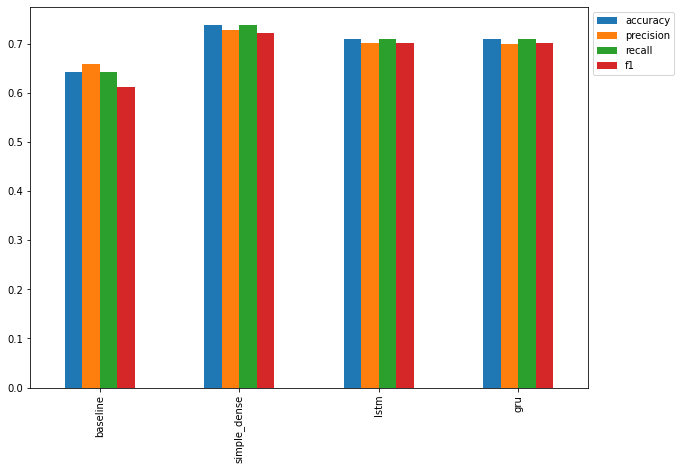

In [ ]:
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

## Resultado final: Modelo 1 - Simple_dense

O modelo 1 adquiriu uma acurácia de 73% (0.73), sendo a mais alta comparado aos outros. Vamos melhor observar os resultados encontrados pelo modelo.

Função **accuracy_score** da SKLEARN para avaliar o modelo:

In [ ]:
final_model_accuracy = accuracy_score(y_test, model_1_y_preds)
print(f"O melhor modelo possui uma nota de corte de: {final_model_accuracy}")

O melhor modelo possui uma nota de corte de: 0.7379528666901161


Abaixo estamos criando uma confusion_matrix para visualizarmos os resultados obtido. Helper-function obtida no curso [TensorFlow Developer Certificate](https://www.udemy.com/course/tensorflow-developer-certificate-machine-learning-zero-to-mastery/).

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=15):
  # Confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  ax.set(title="Confusion Matrix",
          xlabel="Predicted Label",
          ylabel="True Label",
          xticks=np.arange(n_classes),
          yticks=np.arange(n_classes),
          xticklabels=labels,
          yticklabels=labels)
  
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  threshold = (cm.max() + cm.min()) / 2.

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

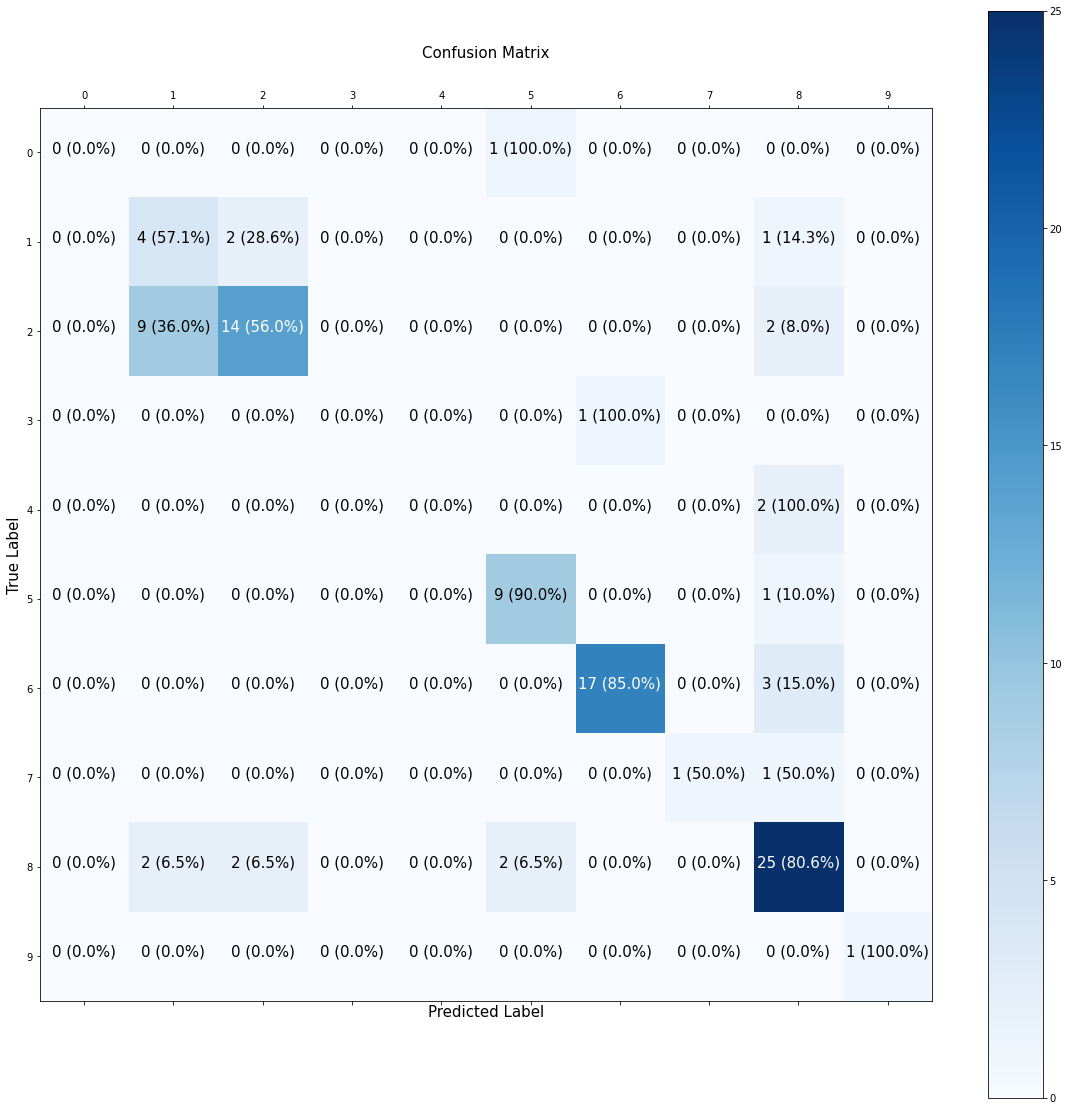

In [ ]:
make_confusion_matrix(y_true=y_test[:100],y_pred=model_1_y_preds[:100], figsize=(20,20))

## Função Validate

In [ ]:
def validate(df_without_product_category, model=model_1):
  df_with_product_category = df_without_product_category

  x_tests = df_without_product_category['review_body']
  x_tests.dropna()
  x_cleaned = x_tests.apply(cleaned1)
  model_result = model_1.predict(x_cleaned)
  model_result_preds = model_result.argmax(axis=1)
  predictions_test = label_encoder.inverse_transform(model_result_preds)
  df_with_product_category['product_category'] = predictions_test

  return df_with_product_category

## Considerações Finais

Nos modelos com menor acurácia (onde foi mais perceptível) conseguimos ver um aumento maior na acurácia no conjunto de treino, durante as epochs, porém uma diminuição na acurácia durante o conjunto de testes o que indica um possível **overfitting** por parte de nossos modelos.

Para buscarmos solucionar isso podemos realizar:
*   Uma melhor e mais detalhada análise nos dados (Como por exemplo considerar apenas as reviews consideradas helpful)
*   Ajustes nos próprios modelos - adicionar ou remover alguma camada, mudança de alguma função de ativação ou de loss, mudança no learning rate, etc.
*   Melhorias no processo de transformar as palavras em tokens e tokens em embedding, além da quantidade de tokens usados nos modelos.